# Yashika Tirkey

***OIBSIP Task 1 - Car Price Predictor***

In [503]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [504]:
car = pd.read_csv('CarPrice.csv')

***In this dataset we have 205 rows and 26 columns.*** 

In [538]:
car.shape

(205, 26)

In [505]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [506]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [507]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# ***Outliers***

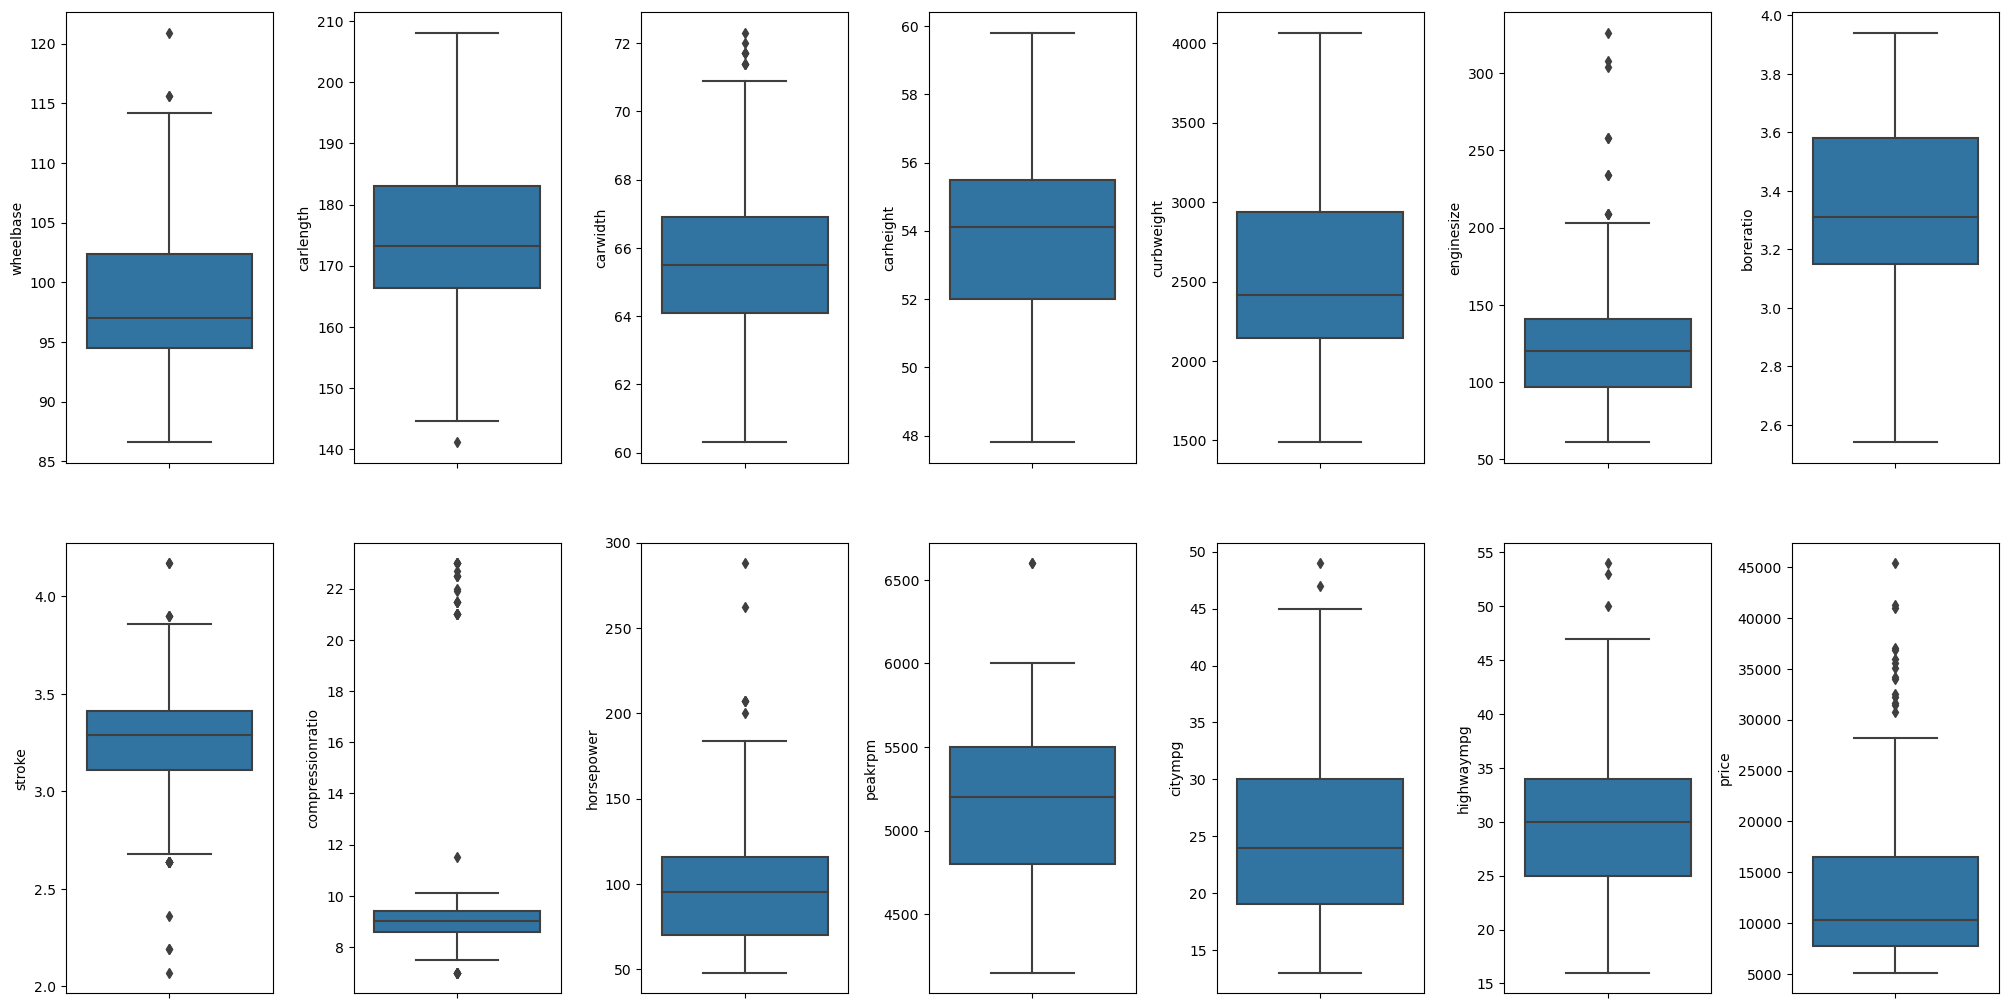

In [508]:

columns_outlier = car.drop(columns=['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','enginetype','fuelsystem'])

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in columns_outlier.items():
    sns.boxplot(y=k, data=columns_outlier, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***Outliers in - wheelbase, carlength, carwidth, enginesize, stroke, cpmpressionration, horsepower, peakpm, citympg, highwaympg and price****
****for the best result, i'm Capping all the Outliers manually***

# ***Removing all the outliers from the Dataset***

In [509]:
percentile25 = car['horsepower'].quantile(0.25)
percentile75 = car['horsepower'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['horsepower'] = np.where( car['horsepower'] > upper_limit,
                        upper_limit,
                        car['horsepower']
)

In [510]:
percentile25 = car['price'].quantile(0.25)
percentile75 = car['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['price'] = np.where( car['price'] > upper_limit,
                        upper_limit,
                        car['price']
)

In [511]:
percentile25 = car['wheelbase'].quantile(0.25)
percentile75 = car['wheelbase'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['wheelbase'] = np.where( car['wheelbase'] > upper_limit,
                        upper_limit,
                        car['wheelbase']
)

In [512]:
percentile25 = car['citympg'].quantile(0.25)
percentile75 = car['citympg'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['citympg'] = np.where( car['citympg'] > upper_limit,
                        upper_limit,
                        car['citympg']
)

In [513]:
percentile25 = car['stroke'].quantile(0.25)
percentile75 = car['stroke'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['stroke'] = np.where( car['stroke']  > upper_limit,
                        upper_limit,
                        np.where( car['stroke']  < lower_limit,
                        lower_limit,
                        car['stroke']
                                ))


In [514]:
percentile25 = car['peakrpm'].quantile(0.25)
percentile75 = car['peakrpm'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['peakrpm'] = np.where( car['peakrpm'] > upper_limit,
                        upper_limit,
                        car['peakrpm']
)

In [515]:
percentile25 = car['carwidth'].quantile(0.25)
percentile75 = car['carwidth'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['carwidth'] = np.where( car['carwidth'] > upper_limit,
                        upper_limit,
                        car['carwidth']
)

In [516]:
percentile25 = car['enginesize'].quantile(0.25)
percentile75 = car['enginesize'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['enginesize'] = np.where( car['enginesize'] > upper_limit,
                        upper_limit,
                        car['enginesize']
)

In [517]:
percentile25 = car['compressionratio'].quantile(0.25)
percentile75 = car['compressionratio'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['compressionratio'] = np.where( car['compressionratio'] > upper_limit,
                                    upper_limit,
                                    np.where( car['compressionratio'] < lower_limit,
                                    lower_limit,
                                    car['compressionratio']
                                            )
)

In [518]:
percentile25 = car['carlength'].quantile(0.25)
percentile75 = car['carlength'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['carlength'] = np.where( car['carlength'] < lower_limit,
                        lower_limit,
                        car['carlength']
)

In [519]:
percentile25 = car['highwaympg'].quantile(0.25)
percentile75 = car['highwaympg'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 +1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr
import numpy as np
car['highwaympg'] = np.where( car['highwaympg'] > upper_limit,
                        upper_limit,
                        car['highwaympg']
)

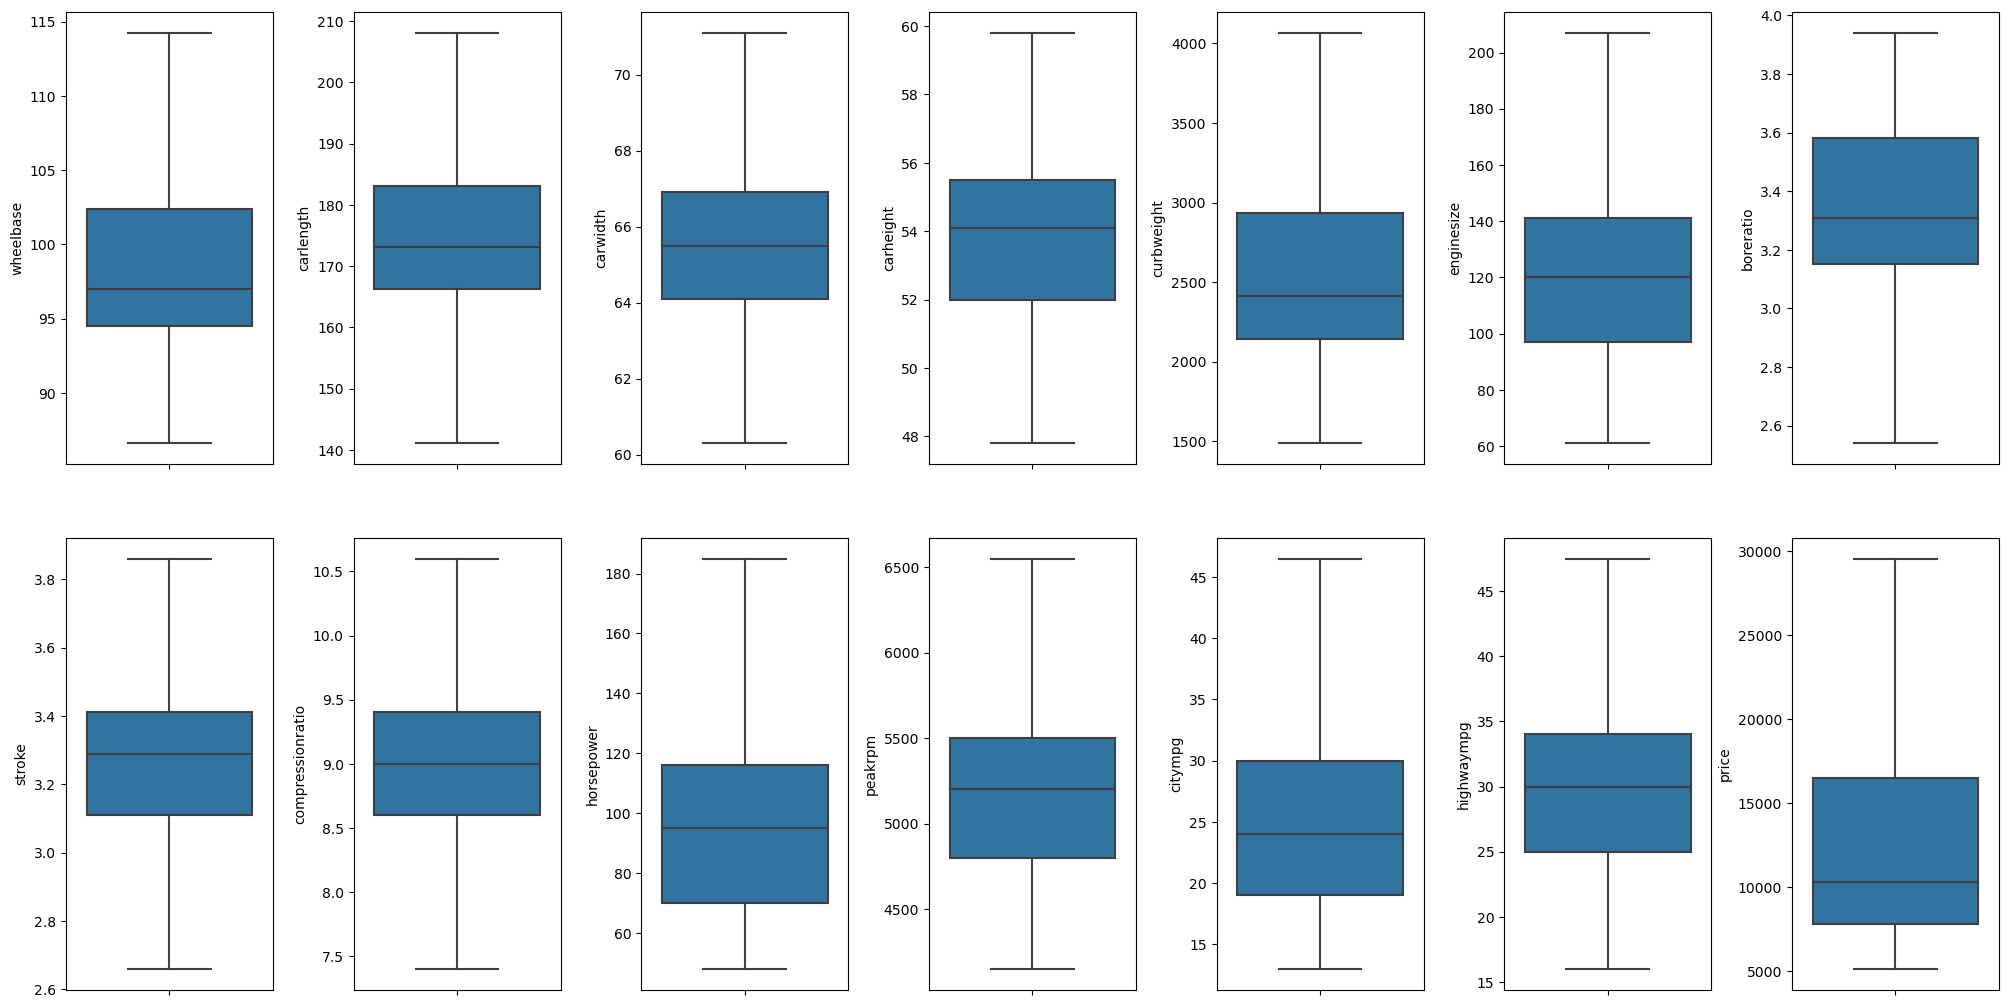

In [520]:
columns_outlier = car.drop(columns=['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','enginetype','fuelsystem'])

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in columns_outlier.items():
    sns.boxplot(y=k, data=columns_outlier, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***Here all the Outliers are Removed from the Dataset. Now we can check linear relationship between each column using Correlation Matrix. From  Correlation, we can easily remove Columns which has High and low variance for better result.*** 

In [521]:
#plt.subplot(2,1,1)
#sns.boxplot(x = car['price'])

#plt.subplot(2,1,1)
#sns.displot(x=car['price'], kde=True)



In [522]:
#plt.subplot(2,1,1)
#sns.boxplot(x = car['price'])

#plt.subplot(2,1,1)
#sns.displot(x=car['price'], kde=True)


# ***correlation of numerical variables with Price***

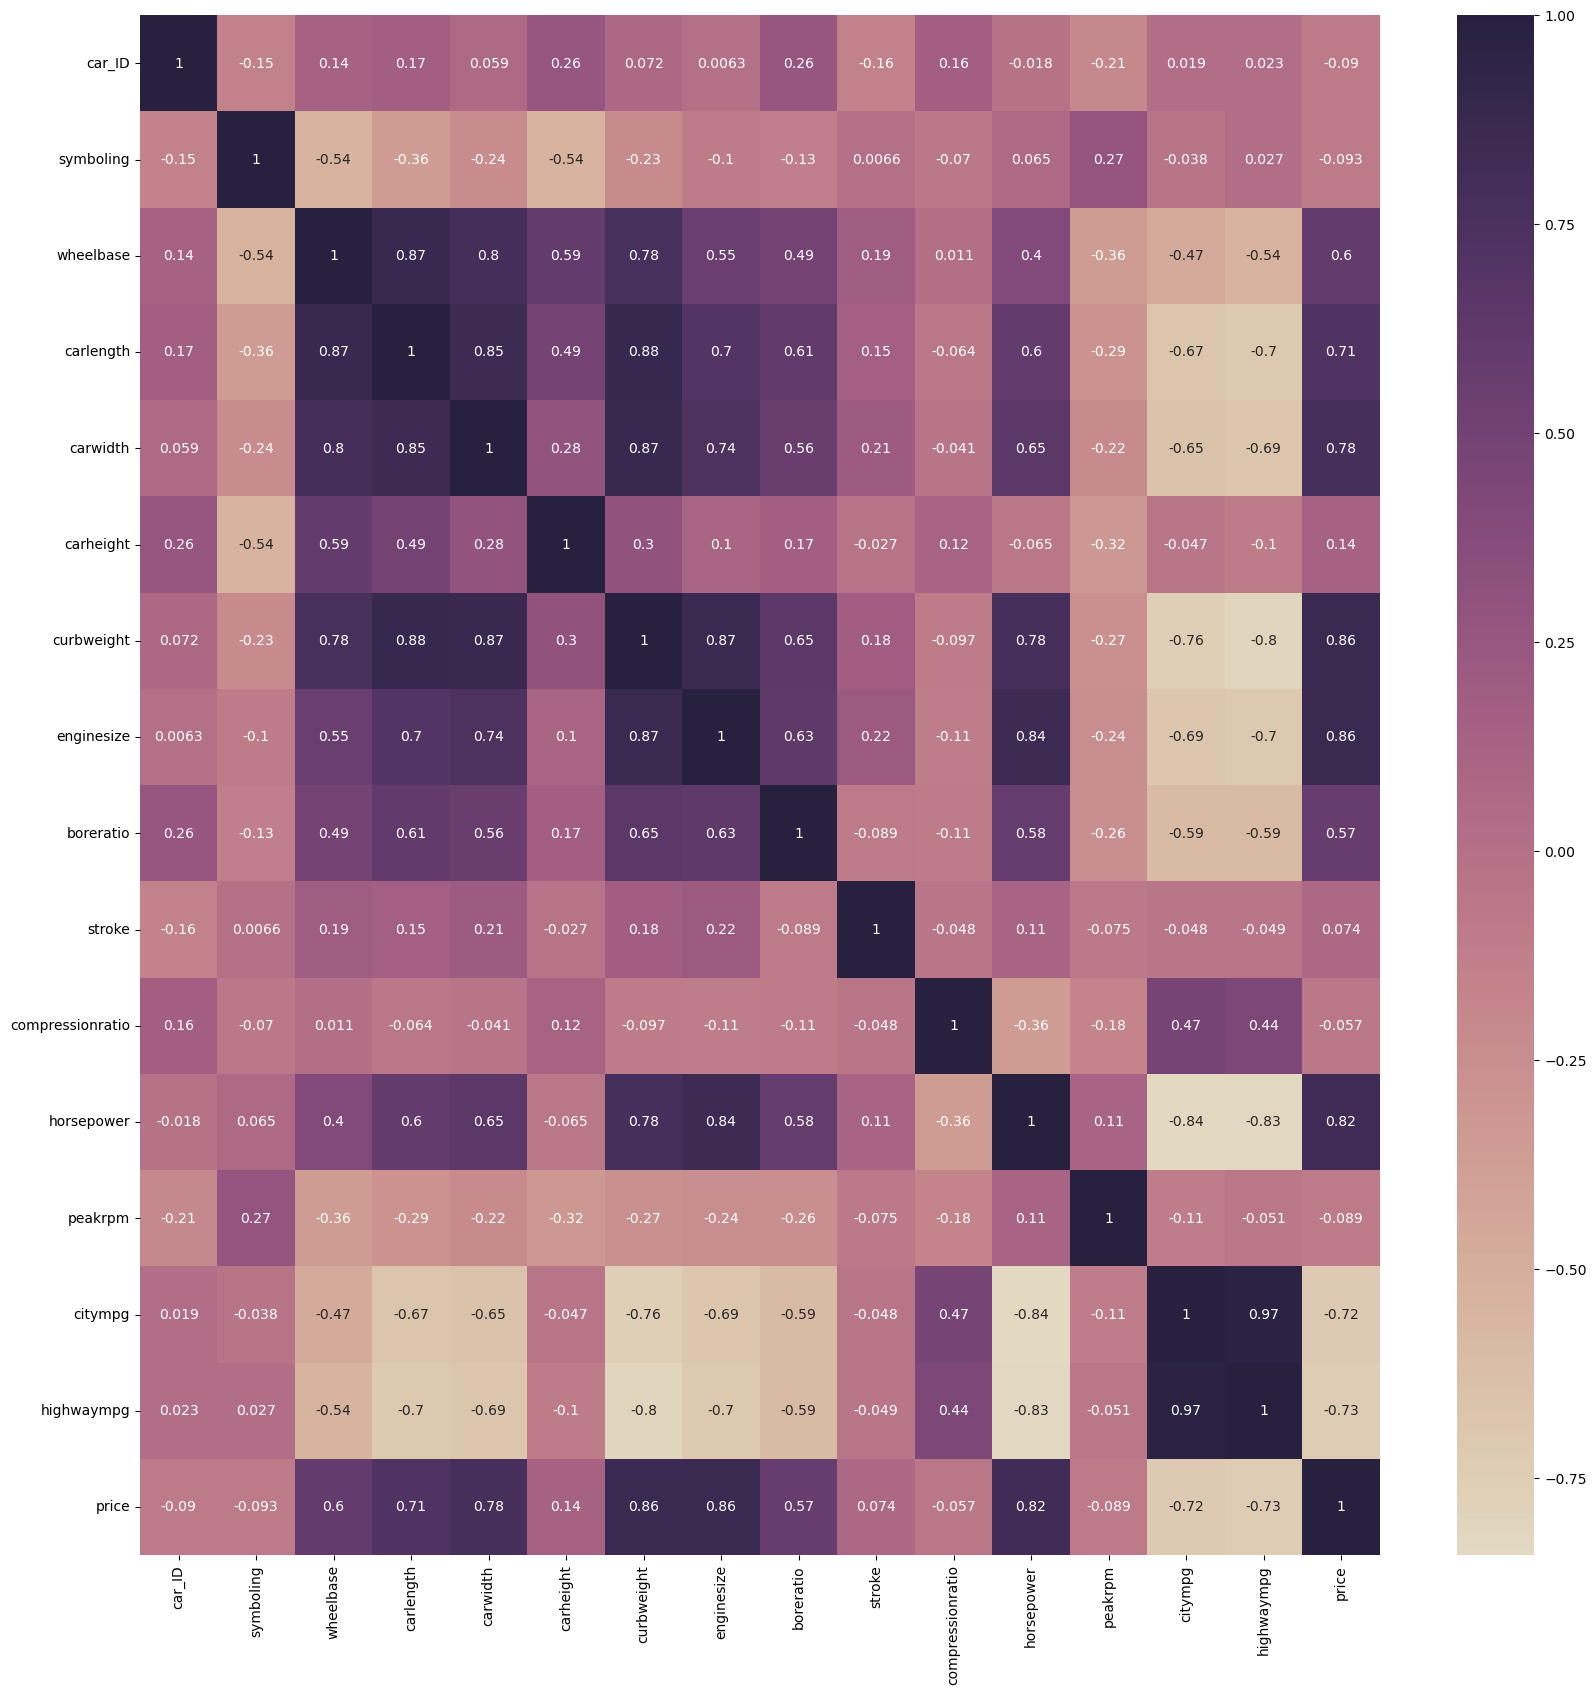

In [523]:
corr = car.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [524]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
dataset = car.drop(columns=['price'])
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(dataset, 0.75)
len(set(corr_features))

7

In [525]:
corr_features

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

In [526]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

***From Above Analysis,***
***Independent Variable are Higly correlated with {'carlength','carwidth','citympg','curbweight','enginesize','highwaympg','horsepower'}
as we can see columns carlength, carwidth and carheight has relationship between them, its not possible to drops the column carlength and carwidth. Same relation in between columns enginesize and engine_location, its not possible to delete the column.***

***Price are Highly correlated with cubrweigth, enginesize, horesepower, wheelbase, carlength ane boreratio.***

***Price are negatively correlated with citympg, Highwaympg, carid and symboling.***

***Linear Regression will be the best model for this DataSet.***


In [527]:

label = LabelEncoder()
car.CarName=label.fit_transform(car['CarName'])
car.fueltype=label.fit_transform(car['fueltype'])
car.aspiration=label.fit_transform(car['aspiration'])
car.doornumber=label.fit_transform(car['doornumber'])
car.carbody=label.fit_transform(car['carbody'])
car.drivewheel=label.fit_transform(car['drivewheel'])
car.enginelocation=label.fit_transform(car['enginelocation'])
car.enginetype=label.fit_transform(car['enginetype'])
car.cylindernumber=label.fit_transform(car['cylindernumber'])
car.enginetype=label.fit_transform(car['enginetype'])
car.fuelsystem=label.fit_transform(car['fuelsystem'])



***Here I'm Encodded all the Categorical Columns***

In [528]:
x = car.drop(columns=['price'])

In [529]:
y = car['price']

In [530]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# ***Linear Regression***

In [534]:

# instantiate
lm = LinearRegression()
# fit
lm.fit(x_train, y_train)
# predict 
y_pred = lm.predict(x_test)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8447261489381453


# ***Finding the Best Model at a certain random state*** 

In [535]:
score=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train, y_train) 
    y_pred = lm.predict(x_test)
    score.append(r2_score(y_true=y_test, y_pred=y_pred))

In [536]:
np.argmax(score)

935

In [537]:
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=935)
lm=LinearRegression()
lm.fit(x_train, y_train)
# predict 
y_pred = lm.predict(x_test)
r2_score(y_true=y_test, y_pred=y_pred)

0.9448637875302653

# ***So the model has accuracy of 94% on test data which is good Model for this Dataset***